In [1]:
# Importing relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the dataset

In [2]:
df = pd.read_csv('ml_modeling/datasets/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [3]:
df.shape

(119390, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

## Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns', None)

## Warning Suppression

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Drop ID Feature from dataset

In [8]:
# No ID is mentioned so we don't perform the drop step

## Defining Targets & Independent features

In [9]:
Y = df['is_canceled']
X = df.drop(['is_canceled'], axis=1)
X.head()

,hotel,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


## Get the cancellation rate

In [10]:
Y.mean()

0.37041628277075134

## Split features into Numerical and Categorical

In [11]:
num = X.select_dtypes(include="number")
char = X.select_dtypes(include="object")

In [12]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x: unique_levels(x)))

In [13]:
df_value_counts.columns=['feature_levels']
df_value_counts


,feature_levels
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5
is_repeated_guest,2


In [14]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [15]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]


In [16]:
num.dtypes

lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_week_nights                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
dtype: object

In [17]:
num.shape

(119390, 10)

In [18]:
char=pd.concat([char,cat],axis=1,join="inner")

In [19]:
char.head()

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015,2015,0,2,0.0,0,0,0,0,0
1,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015,2015,0,2,0.0,0,0,0,0,0
2,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015,2015,0,1,0.0,0,0,0,0,0
3,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015,2015,0,1,0.0,0,0,0,0,0
4,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015,2015,0,2,0.0,0,0,0,0,1


## Outlier Analysis of Numerical Features

In [20]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


## Capping and flooring of outliers

In [21]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [22]:
num=num.apply(lambda x: outlier_cap(x))

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,86.008598,189.206373,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,108.591334,131.297172,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


## Missing Value Analysis

In [24]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

In [25]:
char.isnull().mean()

hotel                          0.000000
arrival_month_year             0.000000
arrival_date_month             0.000000
meal                           0.000000
country                        0.004087
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
deposit_type                   0.000000
customer_type                  0.000000
reservation_status             0.000000
reservation_status_date        0.000000
arrival_date_year              0.000000
stays_in_weekend_nights        0.000000
adults                         0.000000
children                       0.000034
babies                         0.000000
is_repeated_guest              0.000000
previous_cancellations         0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

## Dropping variables that have>25% missing values

In [26]:
num = num.loc[:,num.isnull().mean()<= 0.25]

In [27]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

## Imputation of Missing Values

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [29]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

In [30]:
char.isnull().mean()

hotel                          0.000000
arrival_month_year             0.000000
arrival_date_month             0.000000
meal                           0.000000
country                        0.004087
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
deposit_type                   0.000000
customer_type                  0.000000
reservation_status             0.000000
reservation_status_date        0.000000
arrival_date_year              0.000000
stays_in_weekend_nights        0.000000
adults                         0.000000
children                       0.000034
babies                         0.000000
is_repeated_guest              0.000000
previous_cancellations         0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)


In [32]:
char_1.isnull().mean()

hotel                          0.0
arrival_month_year             0.0
arrival_date_month             0.0
meal                           0.0
country                        0.0
market_segment                 0.0
distribution_channel           0.0
reserved_room_type             0.0
assigned_room_type             0.0
deposit_type                   0.0
customer_type                  0.0
reservation_status             0.0
reservation_status_date        0.0
arrival_date_year              0.0
stays_in_weekend_nights        0.0
adults                         0.0
children                       0.0
babies                         0.0
is_repeated_guest              0.0
previous_cancellations         0.0
required_car_parking_spaces    0.0
total_of_special_requests      0.0
dtype: float64

## Feature Selection - Numerical Features

## Part 1 : Remove Features with 0 Variance

In [33]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
#Get columns to keep & create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2=num_1.iloc[:,cols]

In [34]:
len(num_2), len(num)

(119390, 119390)

In [35]:
num_2.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

# Part1 - Bi Variate Analysis(Feature Discretization)

In [36]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.tail()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0
119389,8.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0


### TODO: DELETE BELOW CELLS - THESE ARE FOR LEARNING

In [37]:
num_binned['lead_time_Rank'].value_counts()

3.0    12501
2.0    12343
6.0    12220
9.0    12018
7.0    11968
8.0    11931
5.0    11912
0.0    11874
4.0    11645
1.0    10978
Name: lead_time_Rank, dtype: int64

In [38]:
num

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342,27,1,0,0,3,NaN,0,0.00
1,444,27,1,0,0,3,NaN,0,0.00
2,7,27,1,1,0,0,NaN,0,75.00
3,13,27,1,1,0,0,304.0,0,75.00
4,14,27,1,2,0,0,240.0,0,98.00
...,...,...,...,...,...,...,...,...,...
119385,23,35,30,5,0,0,390.0,0,96.14
119386,102,35,31,5,0,0,9.0,0,225.43
119387,34,35,31,5,0,0,9.0,0,157.71
119388,109,35,31,5,0,0,89.0,0,104.40


In [39]:

print(discrete.n_bins_)
discrete.bin_edges_

[10 10 10  6  1  2  6  1 10]


array([array([  0.,   3.,  11.,  26.,  45.,  69.,  99., 138., 184., 265., 444.]),
       array([ 2.,  8., 14., 18., 23., 28., 32., 36., 41., 46., 53.]),
       array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
       array([ 0.,  1.,  2.,  3.,  4.,  5., 10.]), array([0., 3.]),
       array([0., 1., 3.]),
       array([  1.        ,   6.        ,   9.        ,  28.        ,
        86.00859777, 240.        , 390.        ]),
       array([ 0., 75.]),
       array([  0.   ,  50.   ,  64.   ,  75.   ,  85.   ,  94.575, 105.   ,
       118.15 , 135.   , 164.   , 252.   ])], dtype=object)

In [40]:
len(num.columns)
num.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list', 'adr'],
      dtype='object')

In [41]:
c='previous_bookings_not_canceled'
num[c].unique()

array([0, 1, 2, 3], dtype=int64)

In [42]:
#check if the features show a slope at all
#if they do, them do you see some deciles below the popuilation average & some higher than population average?
#if that is the case then the slope will be strong
#conclusion: A strong slope is indicative of the features ability to discriminate the event or non event
# making it a good predictor
#percentage_income_goes into_installments=Installment/annual_inc (Derived Variable Feature Engineering)

X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

### TODO: DELETE ABOVE CELLS - THESE ARE FOR LEARNING

In [43]:
#check if the features show a slope at all
#if they do, them do you see some deciles below the popuilation average & some higher than population average?
#if that is the case then the slope will be strong
#conclusion: A strong slope is indicative of the features ability to discriminate the event or non event
# making it a good predictor
#percentage_income_goes into_installments=Installment/annual_inc (Derived Variable Feature Engineering)

X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

NameError: name 'mean' is not defined

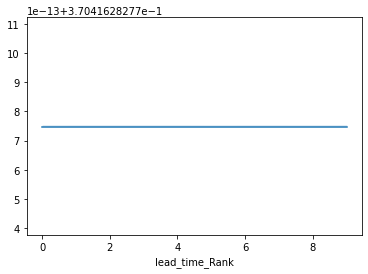

In [44]:
# ROUGH WORK 
col = "lead_time_Rank"
sns.lineplot(x=col, y=[Y.mean()]*119390, data=X_bin_combined)
sns.barplot(x=col, y="is_canceled", data=X_bin_combined, estimator=mean)
sns.lineplot(x=col, y="is_canceled", data=X_bin_combined)

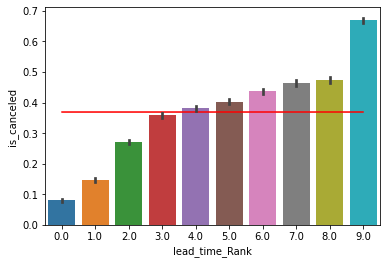

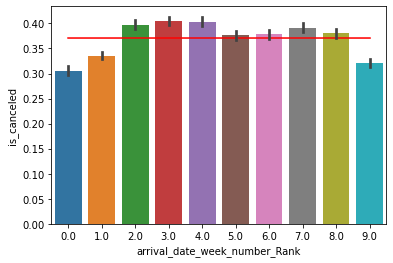

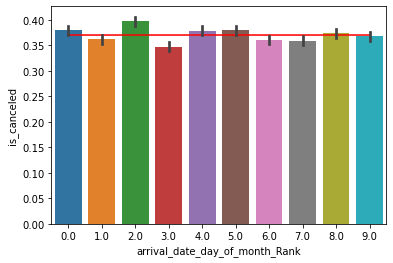

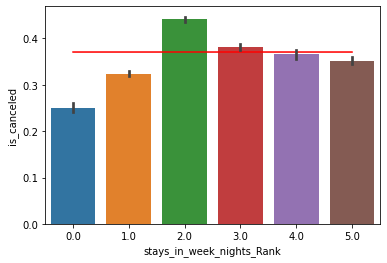

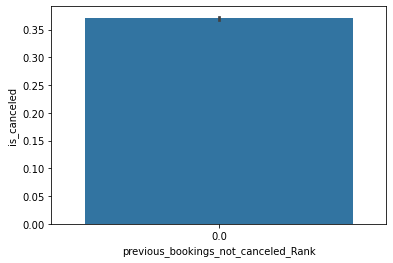

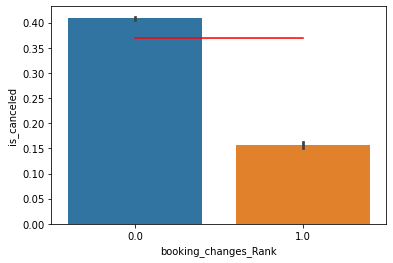

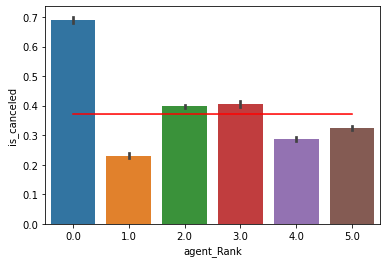

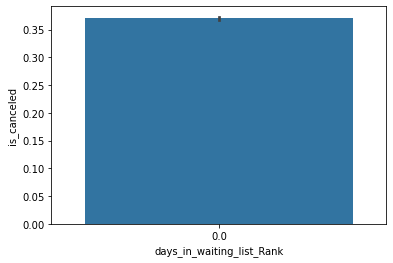

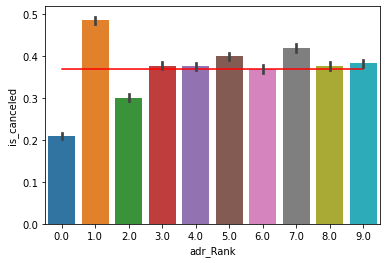

In [45]:
#check if the features show a slope at all
#if they do, them do you see some deciles below the popuilation average & some higher than population average?
#if that is the case then the slope will be strong
#conclusion: A strong slope is indicative of the features ability to discriminate the event or non event
# making it a good predictor
#percentage_income_goes into_installments=Installment/annual_inc (Derived Variable Feature Engineering)
from numpy import mean
y_mean = [Y.mean()]*119390
X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=y_mean,data=X_bin_combined, color='red')
    sns.barplot(x=col, y="is_canceled", data=X_bin_combined, estimator=mean)
    plt.show()

In [46]:
# check the descriptive statistics for the following features
# previous_bookings_not_canceled
# days_in_waiting_list
# booking_changes

# find out which bookings were in the waiting list
num_2['day_wait_ind'] = np.where(num_2['days_in_waiting_list']>0,1,0)
num_2['previous_bookings_not_canceled_ind'] = np.where(num_2['previous_bookings_not_canceled']>0,1,0)
num_2['booking_changes_ind'] = np.where(num_2['booking_changes']>0,1,0)

In [47]:
num_varlist=['adr','arrival_date_day_of_month','arrival_date_week_number','days_in_waiting_list','previous_bookings_not_canceled', 'booking_changes']
num_2=num_2.drop(num_varlist,axis=1)

In [48]:
num_2.shape

(119390, 6)

## Part 2 - Select K Best

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=4)
selector.fit_transform(num_2,Y)

#get colums to keep and create new dataframe with those only
cols=selector.get_support(indices=True)
select_features_df_num = num_2.iloc[:,cols]


In [50]:
select_features_df_num.iloc[0]

lead_time                             342.000000
agent                                  86.008598
previous_bookings_not_canceled_ind      0.000000
booking_changes_ind                     1.000000
Name: 0, dtype: float64

## Feature Selection - Categorical Features

In [51]:
char.dtypes

hotel                           object
arrival_month_year              object
arrival_date_month              object
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
reservation_status              object
reservation_status_date         object
arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

## Part1 - Bi Variant Analysis

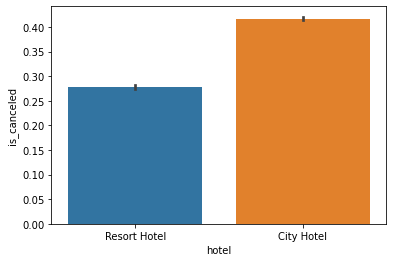

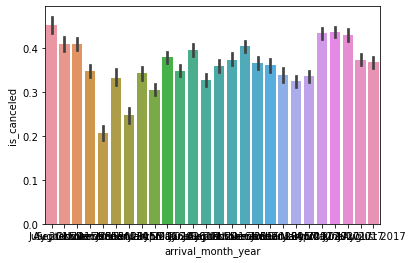

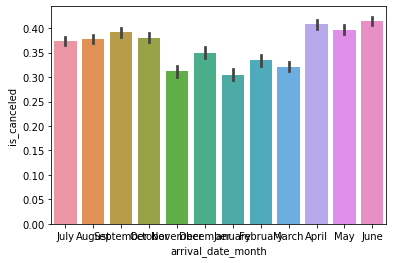

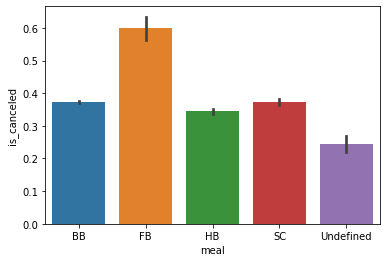

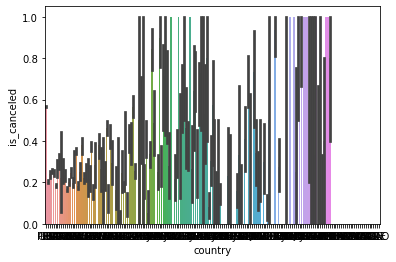

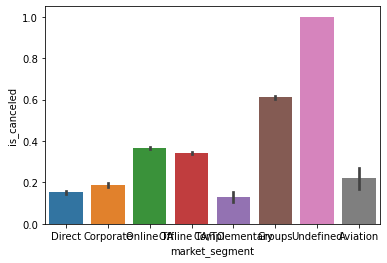

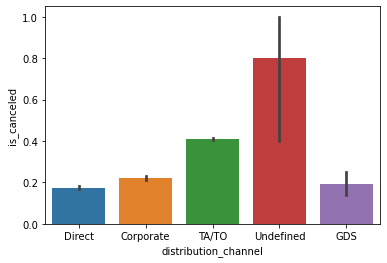

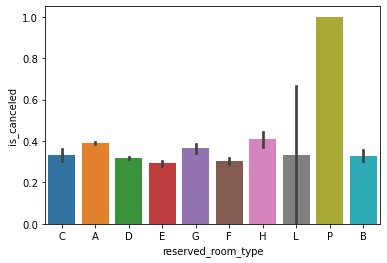

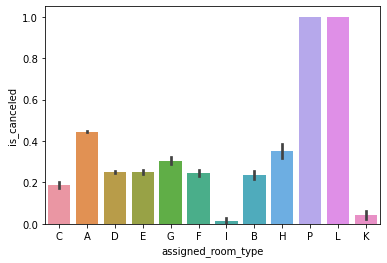

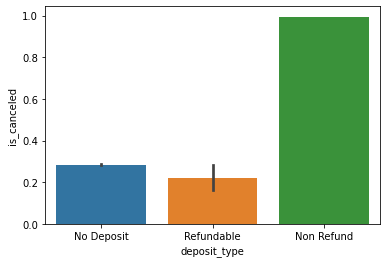

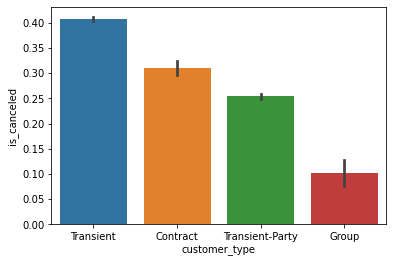

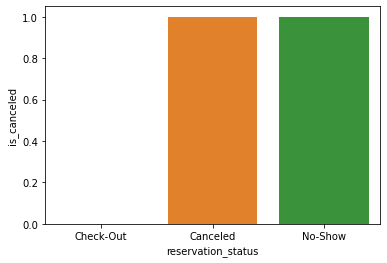

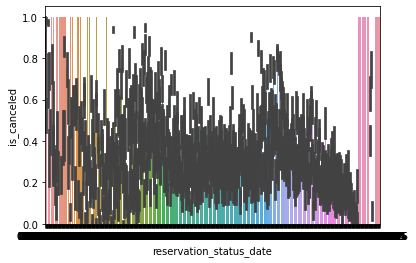

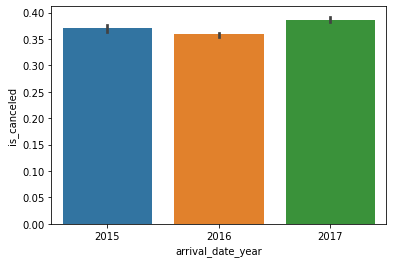

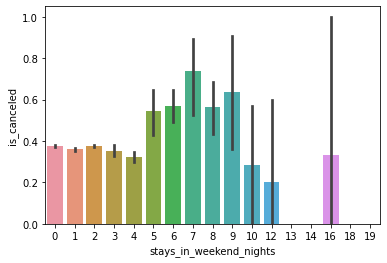

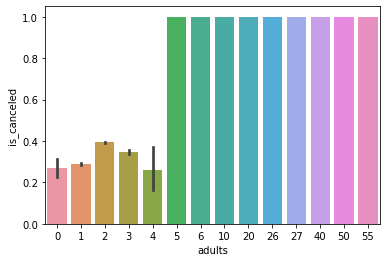

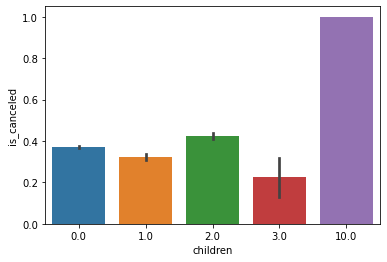

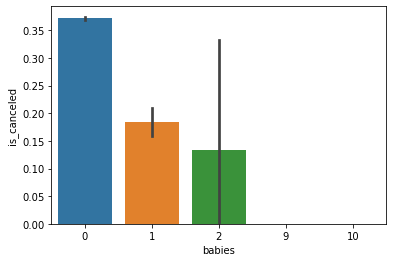

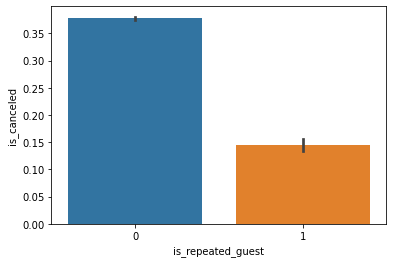

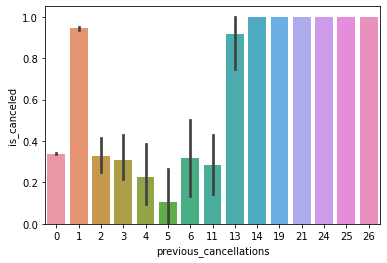

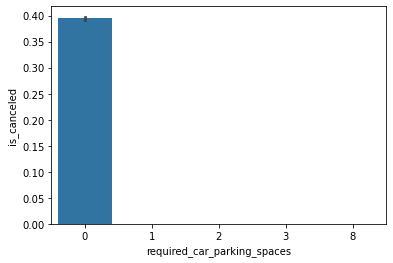

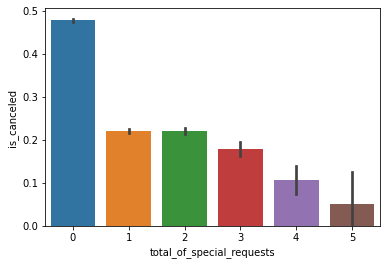

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')
from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="is_canceled", data=X_char_merged, estimator=mean)
plt.show()    

In [53]:
charlist=['arrival_date_month','country','reserved_room_type','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year']
char_1 = char_1.drop(charlist,axis=1)

In [55]:
 char_1.dtypes

hotel                          object
arrival_month_year             object
meal                           object
market_segment                 object
distribution_channel           object
deposit_type                   object
customer_type                  object
stays_in_weekend_nights        object
adults                         object
children                       object
babies                         object
is_repeated_guest              object
previous_cancellations         object
required_car_parking_spaces    object
total_of_special_requests      object
dtype: object

In [54]:
#create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first=True)
X_char_dum.shape

(119390, 107)

## Part 2 - Select K Best

In [57]:
# Select K Best for Categorical Features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=100)
selector.fit_transform(X_char_dum,Y)

#Get columns to keep  & create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [58]:
select_features_df_char.iloc[0]

hotel_Resort Hotel                  1
arrival_month_year_April 2017       0
arrival_month_year_August 2015      0
arrival_month_year_August 2016      0
arrival_month_year_December 2015    0
                                   ..
total_of_special_requests_1         0
total_of_special_requests_2         0
total_of_special_requests_3         0
total_of_special_requests_4         0
total_of_special_requests_5         0
Name: 0, Length: 100, dtype: uint8

## Creating the Master Feature Set for Model Development

In [59]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis=1, join="inner")

## Train Test Split



In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all,Y, test_size=0.3, random_state=20)

In [75]:
print("Shape of the Training data", X_train.shape)
print("Shape of the Testing data", X_test.shape)
print("Response rate in Training data", y_train.mean())
print("Response rate in Testing data", y_test.mean())



Shape of the Training data (83573, 104)
Shape of the Testing data (35817, 104)
Response rate in Training data 0.3704426070620894
Response rate in Testing data 0.37035485942429575


In [64]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White  Box(Completely Explainable Set of Rules)-Decision Tree
# Ensemble Methods - GBM/XGBoost (Boosting)


In [76]:
#Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini', random_state=20)


In [77]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth':[3,5,6,7], 'min_samples_split':[140,280,420,560,700]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train, y_train)
print("Best Parameters using grid search : \n', tree_grid.best_params")

Best Parameters using grid search : 
', tree_grid.best_params


In [80]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=5,min_samples_split=140)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [82]:
#Building a Random Forest MOdel
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', random_state=0, max_depth=5, min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [83]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=5,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=140,
                           random_state=0)

In [85]:
#Model Evaluation

y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [88]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [89]:
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred_tree))
print("Precision : ", metrics.precision_score(y_test,y_pred_tree))
print("Recall : ", metrics.recall_score(y_test,y_pred_tree))
print("f1_score : ", metrics.f1_score(y_test,y_pred_tree))


Accuracy :  0.7682664656448055
Precision :  0.9962022786328203
Recall :  0.37572559366754615
f1_score :  0.5456536019268666


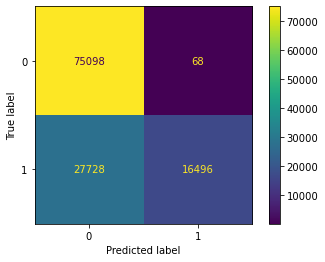

In [90]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [93]:
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred_rf))
print("Precision : ", metrics.precision_score(y_test,y_pred_rf))
print("Recall : ", metrics.recall_score(y_test,y_pred_rf))
print("f1_score : ", metrics.f1_score(y_test,y_pred_rf))


Accuracy :  0.7672334366362342
Precision :  0.997978981406629
Recall :  0.3722578213343385
f1_score :  0.5422500411793774


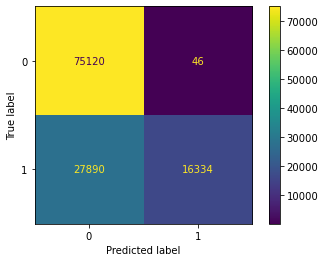

In [94]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [95]:
# Lorenz Curve

In [97]:
# Decision Tree Lorenz Curve

# TODO: DELETE CELLS FROM HERE TILL INSTRUCTED. CELLS ARE FOR LEARNING

In [152]:
# predict the probability of booking retain/cancel
gbm.predict_proba(X_all)

array([[0.85800559, 0.14199441],
       [0.79262223, 0.20737777],
       [0.85232656, 0.14767344],
       ...,
       [0.71939221, 0.28060779],
       [0.44764024, 0.55235976],
       [0.6192302 , 0.3807698 ]])

In [161]:
# form a dataframe with the booking retain/cancel data
proba_df = pd.DataFrame(gbm.predict_proba(X_all), columns=['Prob(Retain)', 'Prob(Cancel)'])
proba_df

,Prob(Retain),Prob(Cancel)
0,0.858006,0.141994
1,0.792622,0.207378
2,0.852327,0.147673
3,0.717246,0.282754
4,0.706210,0.293790
...,...,...
119385,0.812996,0.187004
119386,0.691431,0.308569
119387,0.719392,0.280608
119388,0.447640,0.552360


In [173]:
col = 'P_Rank_dtree'
df[col]

0         4
1         5
2         4
3         6
4         6
         ..
119385    4
119386    6
119387    6
119388    8
119389    7
Name: P_Rank_dtree, Length: 119390, dtype: int8

In [177]:
df["P_Rank_dtree"].unique()

array([ 4,  5,  6,  3,  7,  8,  2,  1,  9, 10], dtype=int8)

In [179]:
df.groupby('P_Rank_dtree')['is_canceled'].agg(['count','mean'])


,count,mean
P_Rank_dtree,,
1,11939,0.009967
2,11939,0.049334
3,11939,0.092051
4,11939,0.134433
5,11939,0.205294
6,11939,0.294665
7,11939,0.420136
8,11939,0.618561
9,11939,0.879722


In [180]:
rank_df_actuals

,count,Actual_event_rate
P_Rank_dtree,,
1,11939,0.009967
2,11939,0.049334
3,11939,0.092051
4,11939,0.134433
5,11939,0.205294
6,11939,0.294665
7,11939,0.420136
8,11939,0.618561
9,11939,0.879722


In [181]:
rank_df_predicted

,Predicted_event_rate
P_Rank_dtree,
1,0.024315
2,0.076804
3,0.116449
4,0.166287
5,0.235352
6,0.309171
7,0.392240
8,0.571698
9,0.827693


In [182]:
rank_df

,count,Actual_event_rate,Predicted_event_rate
P_Rank_dtree,,,
1,11939,0.009967,0.024315
2,11939,0.049334,0.076804
3,11939,0.092051,0.116449
4,11939,0.134433,0.166287
5,11939,0.205294,0.235352
6,11939,0.294665,0.309171
7,11939,0.420136,0.392240
8,11939,0.618561,0.571698
9,11939,0.879722,0.827693


In [188]:
rank_df['count']*rank_df['Actual_event_rate']

P_Rank_dtree
1       119.0
2       589.0
3      1099.0
4      1605.0
5      2451.0
6      3518.0
7      5016.0
8      7385.0
9     10503.0
10    11939.0
dtype: float64

In [183]:
sorted_rank_df 

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap
P_Rank_dtree,,,,,,,,,,,,,,
10,11939,1.000000,0.991902,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,0.1,0.1
9,11939,0.879722,0.827693,10503.0,22442.0,0.237495,0.507462,1436.0,1436.0,0.019104,0.019104,0.4884,0.1,0.2
8,11939,0.618561,0.571698,7385.0,29827.0,0.166991,0.674453,4554.0,5990.0,0.060586,0.079690,0.5948,0.1,0.3
7,11939,0.420136,0.392240,5016.0,34843.0,0.113423,0.787875,6923.0,12913.0,0.092103,0.171793,0.6161,0.1,0.4
6,11939,0.294665,0.309171,3518.0,38361.0,0.079550,0.867425,8421.0,21334.0,0.112032,0.283825,0.5836,0.1,0.5
5,11939,0.205294,0.235352,2451.0,40812.0,0.055422,0.922847,9488.0,30822.0,0.126227,0.410052,0.5128,0.1,0.6
4,11939,0.134433,0.166287,1605.0,42417.0,0.036293,0.959140,10334.0,41156.0,0.137482,0.547535,0.4116,0.1,0.7
3,11939,0.092051,0.116449,1099.0,43516.0,0.024851,0.983991,10840.0,51996.0,0.144214,0.691749,0.2922,0.1,0.8
2,11939,0.049334,0.076804,589.0,44105.0,0.013319,0.997309,11350.0,63346.0,0.150999,0.842748,0.1546,0.1,0.9


In [195]:
sorted_rank_df['count'].cumsum()

P_Rank_dtree
10     11939
9      23878
8      35817
7      47756
6      59695
5      71634
4      83573
3      95512
2     107451
1     119390
Name: count, dtype: int64

In [194]:
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())

0.23749547756874095

In [192]:
sorted_rank_df['N_events'].cumsum()

P_Rank_dtree
10    11939.0
9     22442.0
8     29827.0
7     34843.0
6     38361.0
5     40812.0
4     42417.0
3     43516.0
2     44105.0
1     44224.0
Name: N_events, dtype: float64

# TODO: DELETE CELL BLOCKS ABOVE

In [202]:
y_pred_prob = gbm.predict_proba(X_all)[:,1]
df['y_pred_P'] = pd.DataFrame(y_pred_prob)

df['P_Rank_dtree'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes+1

rank_df_actuals=df.groupby('P_Rank_dtree')['is_canceled'].agg(['count','mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals) 
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'}, inplace=True)

rank_df_predicted=df.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)

rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')

sorted_rank_df = rank_df.sort_values(by='P_Rank_dtree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()

sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum()) / max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_dtree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,11939,1.000000,0.991902,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,0.1,0.1,1,2.699665
1,9,11939,0.879722,0.827693,10503.0,22442.0,0.237495,0.507462,1436.0,1436.0,0.019104,0.019104,0.4884,0.1,0.2,2,2.374955
2,8,11939,0.618561,0.571698,7385.0,29827.0,0.166991,0.674453,4554.0,5990.0,0.060586,0.079690,0.5948,0.1,0.3,3,1.669908
3,7,11939,0.420136,0.392240,5016.0,34843.0,0.113423,0.787875,6923.0,12913.0,0.092103,0.171793,0.6161,0.1,0.4,4,1.134226
4,6,11939,0.294665,0.309171,3518.0,38361.0,0.079550,0.867425,8421.0,21334.0,0.112032,0.283825,0.5836,0.1,0.5,5,0.795496
5,5,11939,0.205294,0.235352,2451.0,40812.0,0.055422,0.922847,9488.0,30822.0,0.126227,0.410052,0.5128,0.1,0.6,6,0.554224
6,4,11939,0.134433,0.166287,1605.0,42417.0,0.036293,0.959140,10334.0,41156.0,0.137482,0.547535,0.4116,0.1,0.7,7,0.362925
7,3,11939,0.092051,0.116449,1099.0,43516.0,0.024851,0.983991,10840.0,51996.0,0.144214,0.691749,0.2922,0.1,0.8,8,0.248508
8,2,11939,0.049334,0.076804,589.0,44105.0,0.013319,0.997309,11350.0,63346.0,0.150999,0.842748,0.1546,0.1,0.9,9,0.133186
9,1,11939,0.009967,0.024315,119.0,44224.0,0.002691,1.000000,11820.0,75166.0,0.157252,1.000000,-0.0000,0.1,1.0,10,0.026908


<AxesSubplot:title={'center':'Gains Chart'}, xlabel='Decile', ylabel='cum_event_cap'>

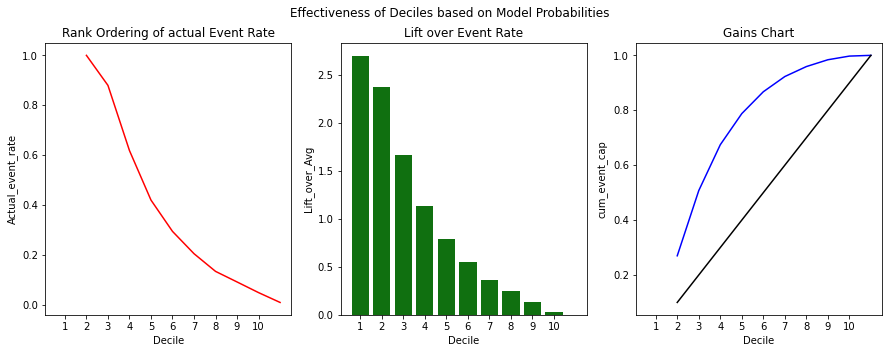

In [211]:
fig,axes =plt.subplots(1,3,sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of actual Event Rate')
axes[1].set_title('Lift over Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0], x ="Decile", y="Actual_event_rate",data=sorted_reindexed, color='red')
sns.barplot(ax=axes[1], x ="Decile", y="Lift_over_Avg", data=sorted_reindexed, color='green')
sns.lineplot(ax=axes[2],x ="Decile",y="cum_event_cap", data=sorted_reindexed, color='blue')
sns.lineplot(ax=axes[2],x ="Decile",y="cum_random_cap", data=sorted_reindexed, color='black')


## Machine Learning ==> Strategy

## Introducing APT Framework

## A - Audience

## P - Prioritization

## T -Treatment










## Audience

In [214]:
df['Predicted_cancel_Rank'] =  np.where(df['P_Rank_dtree']<8,"Bottom7","Top3")
df.Predicted_cancel_Rank.value_counts()

Bottom7    83573
Top3       35817
Name: Predicted_cancel_Rank, dtype: int64

In [219]:
df_top3=df.loc[df['Predicted_cancel_Rank']=='Top3',:]

In [220]:
df_top3.shape

(35817, 36)

In [ ]:
Prioritization

In [222]:
df['lead_time_Rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1

In [223]:
df.groupby('lead_time_Rank')['lead_time'].agg(['min','mean','max'])

,min,mean,max
lead_time_Rank,,,
1,0,0.652735,3
2,3,6.449703,11
3,11,18.337465,26
4,26,35.099757,45
5,45,56.680291,69
6,69,83.823603,99
7,99,117.566044,138
8,138,160.550130,184
9,184,219.433286,265


In [224]:
df.lead_time.mean()

104.01141636652986

In [232]:
df['lead_time_segment']=np.where(df['lead_time_Rank'] >= 7, "High Lead Time", "Low Lead Time")
df.lead_time_segment.value_counts()

Low Lead Time     71634
High Lead Time    47756
Name: lead_time_segment, dtype: int64

In [227]:
df['adr_RANK']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1

In [236]:
df.groupby('adr_RANK')['adr'].agg(['min','mean','max'])

,min,mean,max
adr_RANK,,,
1,-6.38,32.638938,50.00
2,50.00,59.250104,64.00
3,64.00,69.332909,75.00
4,75.00,79.526233,85.00
5,85.00,89.482808,94.56
6,94.59,99.285965,105.00
7,105.00,111.376652,118.15
8,118.15,125.793015,135.00
9,135.00,147.667347,164.00


In [237]:
df.adr.mean()

101.83112153446453

In [240]:
df['adr_segment']=np.where(df['adr_RANK']>=7, "High ADR", "Low ADR")
df.adr_segment.value_counts()

Low ADR     71634
High ADR    47756
Name: adr_segment, dtype: int64

In [244]:
pd.crosstab(index=df['adr_segment'], columns= df['lead_time_segment'],values=df['adr'],aggfunc='mean')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,141.203654,151.099370
Low ADR,74.960245,69.300239


In [247]:
pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'],values=df['adr'],aggfunc='count')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,18825,28931
Low ADR,28931,42703


## Treatment

In [248]:
service_list=['stays_in_weekend_nights', 'total_of_special_requests', 'reserved_room_type']

In [249]:
df_top3_services= df_top3[service_list]

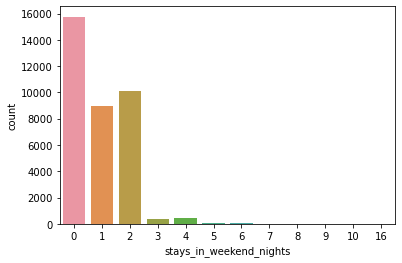

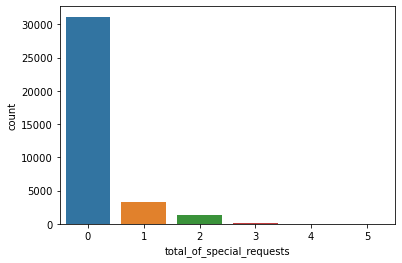

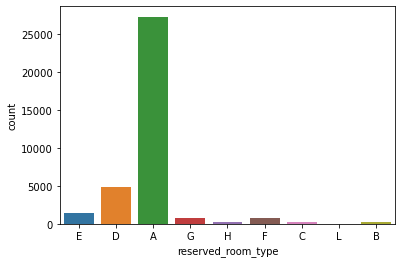

In [250]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()